In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
bejaia_df = pd.read_csv("Forest Fire data/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1, nrows=122)
bejaia_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
bejaia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB


In [4]:
bejaia_df.isna().sum() # no outliers

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [5]:
bejaia_df = bejaia_df.rename(columns = {i: i.strip() for i in bejaia_df.columns})
bejaia_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [6]:
print(bejaia_df["Classes"].unique())
bejaia_df["Classes"] = bejaia_df["Classes"].str.strip()
print(bejaia_df["Classes"].unique())

['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ']
['not fire' 'fire']


In [7]:
bejaia_df.drop(columns=["day", "year"], inplace=True)
bejaia_df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

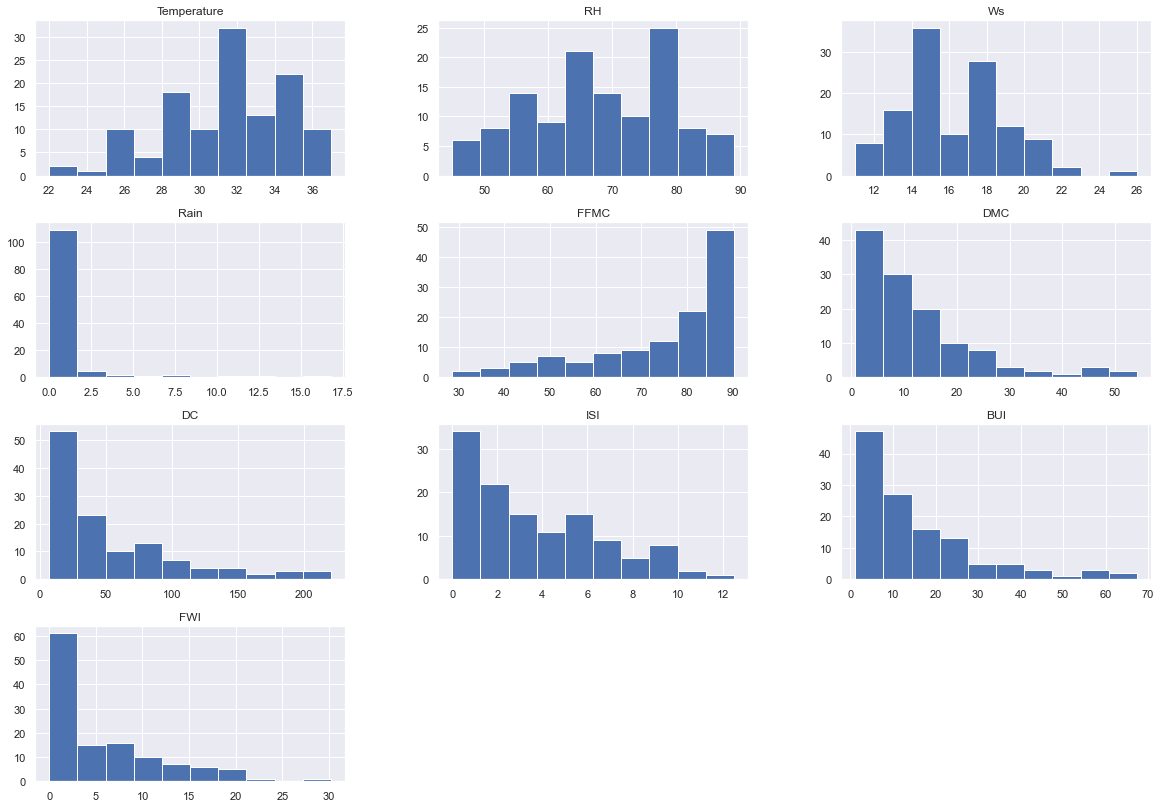

In [8]:
bejaia_df.drop(columns=["month"]).hist(figsize=(20,14),color='b')

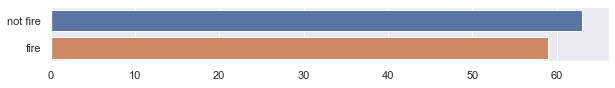

In [9]:
plt.figure(figsize=(10,1))
sns.barplot(y = bejaia_df["Classes"].value_counts().index, x = bejaia_df["Classes"].value_counts().values, orient='h')
plt.show()

In [10]:
bejaia_df["Classes"].value_counts()

not fire    63
fire        59
Name: Classes, dtype: int64

In [11]:
bejaia_df.groupby("month")["Classes"].value_counts()

month  Classes 
6      not fire    17
       fire        13
7      not fire    16
       fire        15
8      fire        24
       not fire     7
9      not fire    23
       fire         7
Name: Classes, dtype: int64

In [12]:
bejaia_df.drop(columns=["month"], inplace=True)

In [13]:
bejaia_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


<AxesSubplot:>

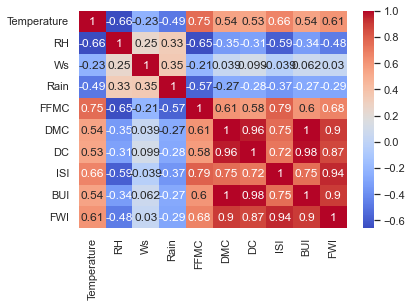

In [14]:
sns.heatmap(bejaia_df.corr(), cmap="coolwarm", annot=True)

In [15]:
bejaia_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


<AxesSubplot:>

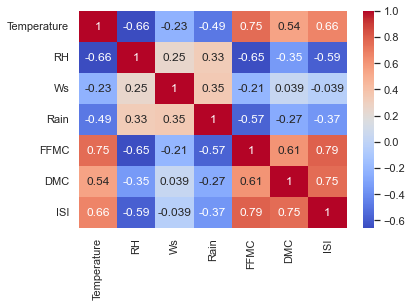

In [16]:
bejaia_df.drop(columns=["DC", "BUI", "FWI"], inplace=True)
sns.heatmap(bejaia_df.corr(), cmap="coolwarm", annot=True)

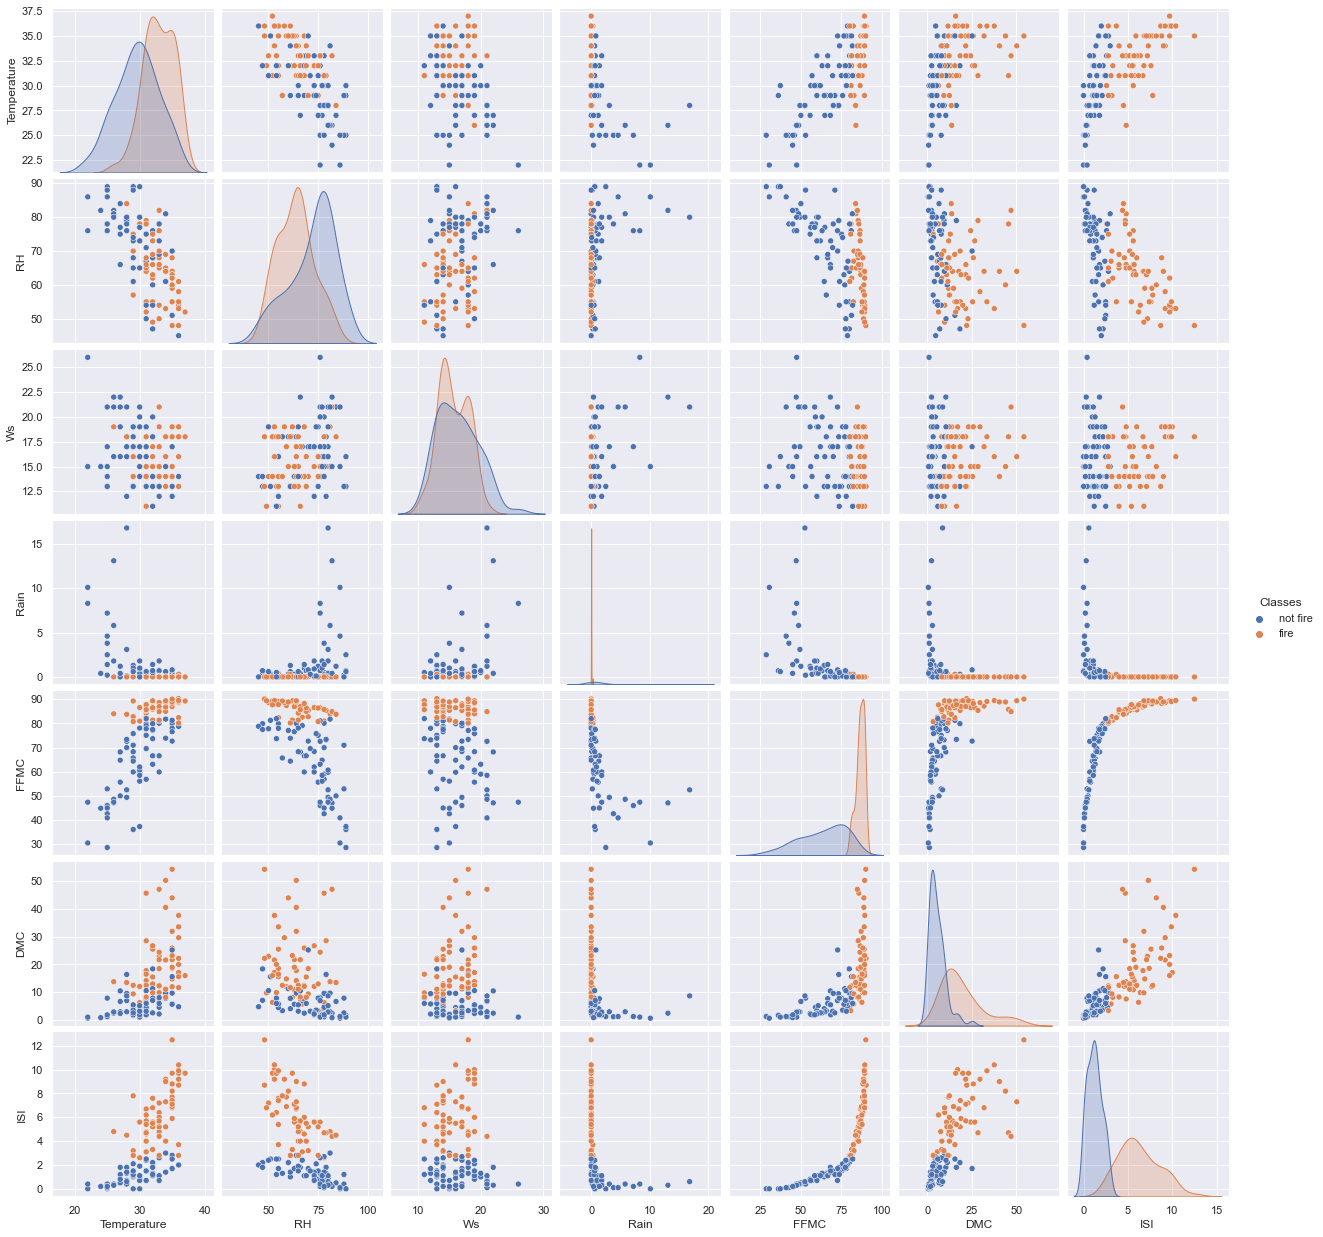

In [17]:
sns.pairplot(bejaia_df, hue="Classes")

In [18]:
bejaia_df["fire"] = pd.get_dummies(bejaia_df["Classes"])["fire"]
bejaia_df.drop(columns=["Classes"], inplace=True)
bejaia_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,fire
0,29,57,18,0.0,65.7,3.4,1.3,0
1,29,61,13,1.3,64.4,4.1,1.0,0
2,26,82,22,13.1,47.1,2.5,0.3,0
3,25,89,13,2.5,28.6,1.3,0.0,0
4,27,77,16,0.0,64.8,3.0,1.2,0


Text(0.5, 1.0, 'index from the FWI system: 1.1 to 65.9')

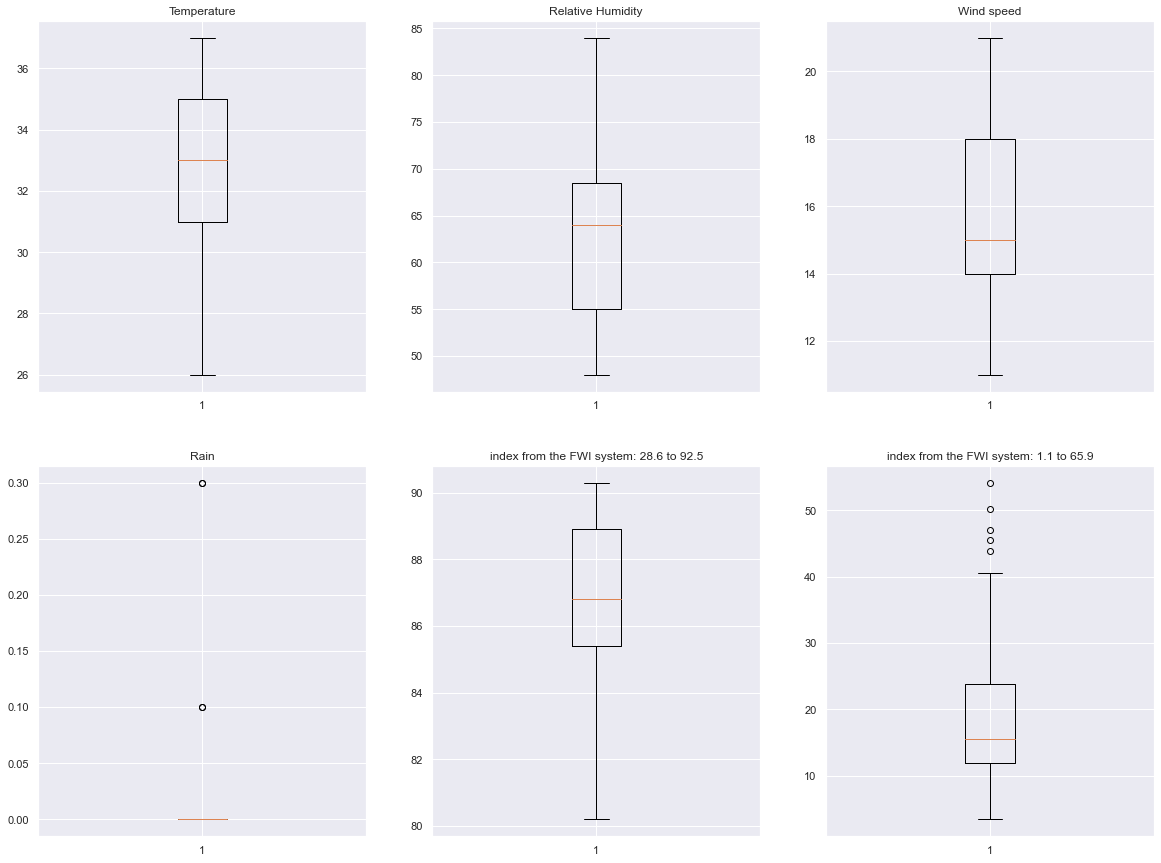

In [19]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].Temperature)
ax.set_title('Temperature')

ax = plt.subplot(232)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].RH)
ax.set_title('Relative Humidity')

ax = plt.subplot(233)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].Ws)
ax.set_title('Wind speed')

ax = plt.subplot(234)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].Rain)
ax.set_title('Rain')

ax = plt.subplot(235)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].FFMC)
ax.set_title('index from the FWI system: 28.6 to 92.5')

ax = plt.subplot(236)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 1].DMC)
ax.set_title('index from the FWI system: 1.1 to 65.9')

Text(0.5, 1.0, 'index from the FWI system: 1.1 to 65.9')

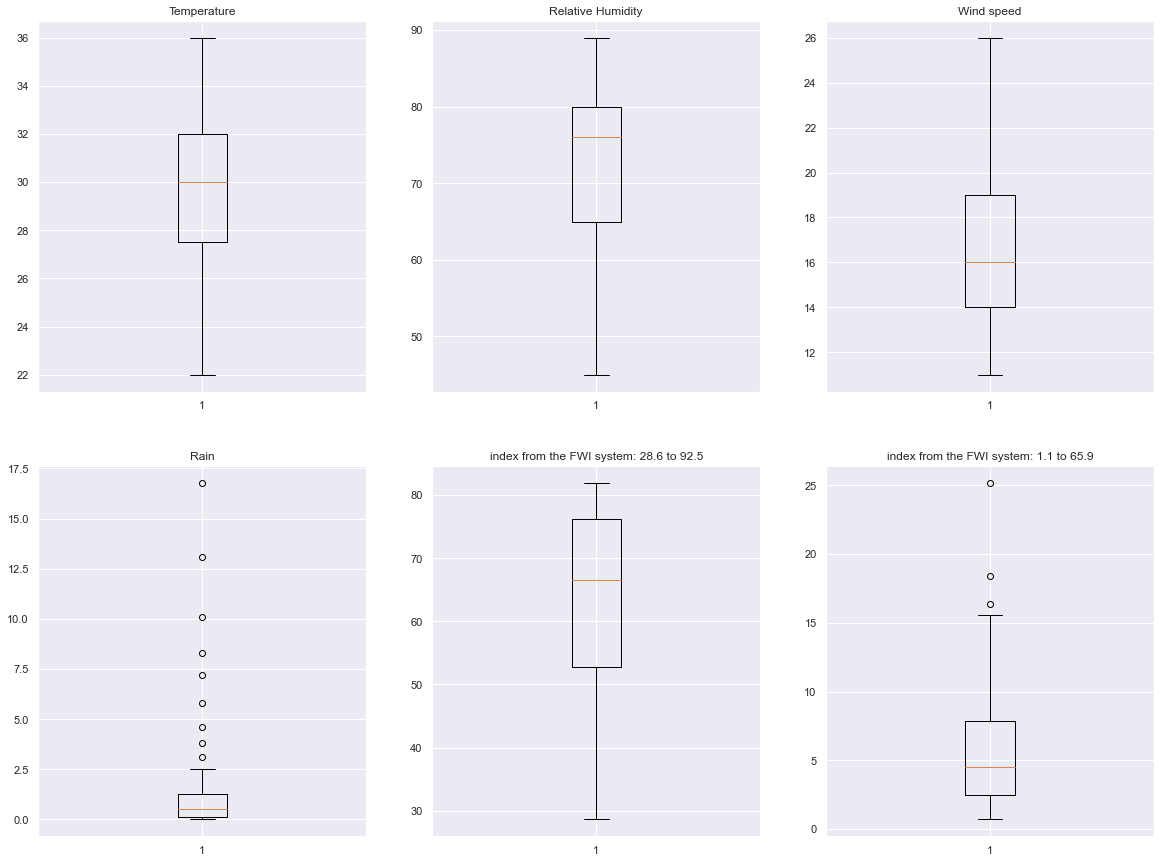

In [20]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].Temperature)
ax.set_title('Temperature')

ax = plt.subplot(232)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].RH)
ax.set_title('Relative Humidity')

ax = plt.subplot(233)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].Ws)
ax.set_title('Wind speed')

ax = plt.subplot(234)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].Rain)
ax.set_title('Rain')

ax = plt.subplot(235)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].FFMC)
ax.set_title('index from the FWI system: 28.6 to 92.5')

ax = plt.subplot(236)
plt.boxplot(bejaia_df[bejaia_df["fire"] == 0].DMC)
ax.set_title('index from the FWI system: 1.1 to 65.9')

In [21]:
from scipy import stats
from math import sqrt
def get_simultaneous_confidence_interval(df, column_name, confidence):
    alpha = 1 - confidence
    std, mean = df[column_name].std(), df[column_name].mean()
    p, n = len(df.columns) - 1, len(df)
    f = sqrt(((n-1)*p)/(n-p)*stats.f.ppf(alpha, p, n-p))
    l,r = mean - (std / sqrt(n)) * f, mean + (std / sqrt(n)) * f
    return [l,r]

fire_df, not_fire_df = bejaia_df[bejaia_df["fire"] == 1], bejaia_df[bejaia_df["fire"] == 0]

print("Simultaneous confidence intervals for attributes when there is fire:")
for col in fire_df.drop(columns=["fire"]).columns:
    print(f"{col} - {get_simultaneous_confidence_interval(fire_df, col, 0.90)}")

print("\nSimultaneous confidence intervals for attributes when there is no fire:")
for col in not_fire_df.drop(columns=["fire"]).columns:
    print(f"{col} - {get_simultaneous_confidence_interval(not_fire_df, col, 0.90)}")

Simultaneous confidence intervals for attributes when there is fire:
Temperature - [32.339670751628546, 33.423041112778236]
RH - [61.57502408151304, 65.7131115117073]
Ws - [15.107962452400603, 16.180173140819736]
Rain - [0.00047452543767213286, 0.026644118630124475]
FFMC - [85.98364744961043, 87.17567458428786]
DMC - [16.749195594644785, 22.19656711721962]
ISI - [5.7223642773088645, 6.762381485402999]

Simultaneous confidence intervals for attributes when there is no fire:
Temperature - [28.855582825896505, 30.319020348706673]
RH - [69.49222931113812, 74.57126275235396]
Ws - [15.617553097515433, 17.04911356915123]
Rain - [0.917955504474927, 2.3201397336203105]
FFMC - [60.35822085095387, 66.68622359349057]
DMC - [4.587076807870974, 6.635145414351245]
ISI - [1.0520796339514145, 1.4145870327152523]


In [22]:
bejaia_df[bejaia_df["fire"] == 1].drop(columns=["fire"]).describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,32.881356,63.644068,15.644068,0.013559,86.579661,19.472881,6.242373
std,2.364134,9.030146,2.339781,0.057107,2.601245,11.887270,2.269529
min,26.000000,48.000000,11.000000,0.000000,80.200000,3.400000,2.600000
25%,31.000000,55.000000,14.000000,0.000000,85.400000,11.850000,4.700000
50%,33.000000,64.000000,15.000000,0.000000,86.800000,15.600000,5.700000
75%,35.000000,68.500000,18.000000,0.000000,88.900000,23.800000,7.650000
max,37.000000,84.000000,21.000000,0.300000,90.300000,54.200000,12.500000


In [23]:
bejaia_df[bejaia_df["fire"] == 0].drop(columns=["fire"]).describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,29.587302,72.031746,16.333333,1.619048,63.522222,5.611111,1.233333
std,3.309980,11.487677,3.237881,3.171438,14.312576,4.632289,0.819913
min,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,0.000000
25%,27.500000,65.000000,14.000000,0.100000,52.700000,2.450000,0.550000
50%,30.000000,76.000000,16.000000,0.500000,66.600000,4.500000,1.200000
75%,32.000000,80.000000,19.000000,1.250000,76.200000,7.850000,1.800000
max,36.000000,89.000000,26.000000,16.800000,82.000000,25.200000,3.000000


Hypothesis: In a region with mean [ Temp, RH, Rain] = [33, 64, 0.015] a fire will start 90% of the time.

In [24]:
def hoteling_t2(df, confidence):
    alpha = 1 - confidence
    p, n = 3, 59
    df = df[df["fire"] == 1]
    S = df[["Temperature", "RH", "Rain"]].cov()
    S_inv = np.linalg.inv(S)
    temp_mean, RH_mean, Rain_mean = df[["Temperature", "RH", "Rain"]].mean()
    X_bar_curl = np.array([[temp_mean, RH_mean, Rain_mean]]).T
    nu_bar_curl = np.array([[33, 64, 0.015]]).T
    hoteling_t2_val = (n * (X_bar_curl - nu_bar_curl).T @ S_inv @ (X_bar_curl - nu_bar_curl))[0][0]
    print(f"Hoteling T2 value: {hoteling_t2_val}")
    chi_2 = stats.chi2.ppf(alpha, p)
    print(f"Critical Value chi squared: {chi_2}")
    if hoteling_t2_val > chi_2:
        print("Hypothesis is rejected")
    else:
        print("Hypothesis failed to reject")
hoteling_t2(bejaia_df, 0.90)

Hoteling T2 value: 0.5814421035829479
Critical Value chi squared: 0.5843743741551833
Hypothesis failed to reject


In [25]:
# lda on bejaia_df
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(bejaia_df.drop(columns=["fire"]), bejaia_df["fire"])

lda_df = pd.DataFrame(lda.transform(bejaia_df.drop(columns=["fire"])))

lda_df["fire"] = bejaia_df["fire"]
print(lda_df.head())

          0  fire
0 -2.723226     0
1 -2.147975     0
2 -2.130427     0
3 -3.140449     0
4 -1.229295     0


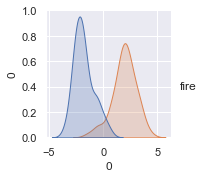

In [26]:
sns.pairplot(lda_df, hue="fire")

Confusion Matrix:
[[13  1]
 [ 1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

ROC_AUC Score: 0.9188311688311689


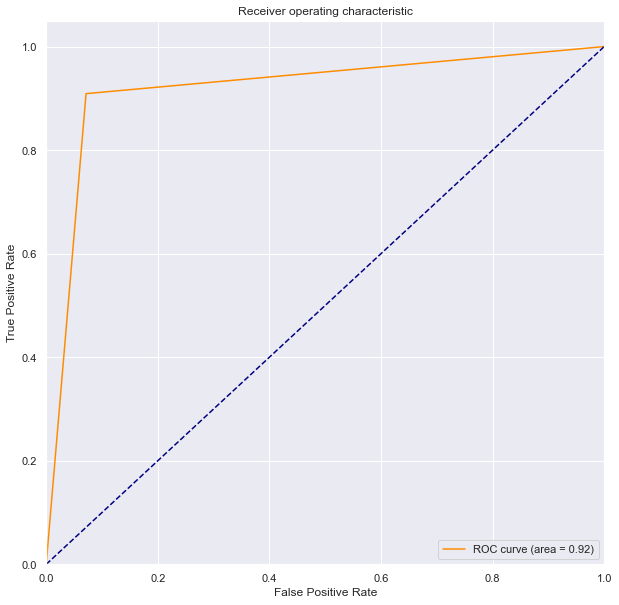

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lda_df.drop(columns=["fire"]), lda_df["fire"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Confusion Matrix:
[[14  0]
 [ 1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

ROC_AUC Score: 0.9545454545454546


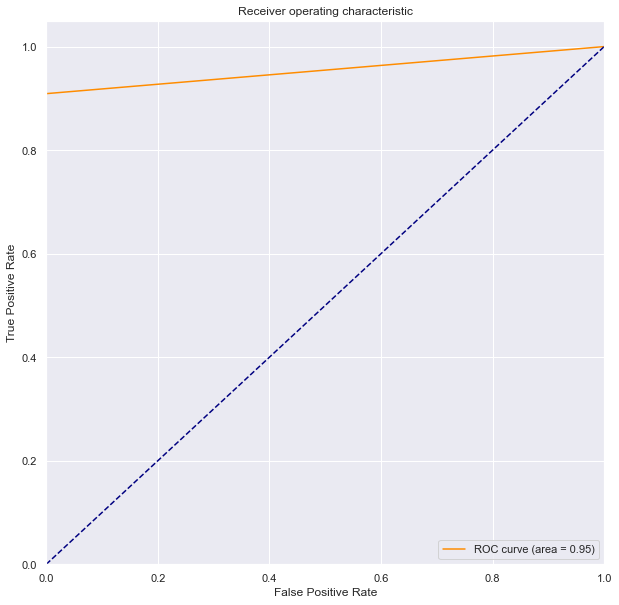

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bejaia_df.drop(columns=["fire"]), bejaia_df["fire"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")   

In [29]:
y_trainpred = logreg.predict(X_train)

print("\nClassification Report:")
print(classification_report(y_train, y_trainpred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        48

    accuracy                           0.98        97
   macro avg       0.98      0.98      0.98        97
weighted avg       0.98      0.98      0.98        97

